# Task 2
## To explore supervised Machine Learning
### Importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("http://bit.ly/w-data")
df #visualizing dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.shape

(25, 2)

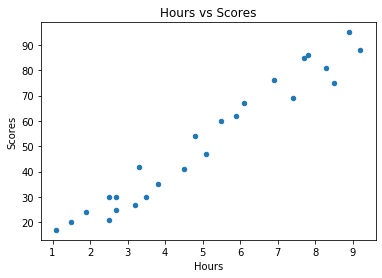

In [4]:
df.plot(x='Hours', y='Scores',kind='scatter')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show() #plotting data

# Preparing Data

In [5]:
X = df.iloc[:,:-1]

X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [6]:
y = df.iloc[:,1]
y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)


# Training the model

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [9]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

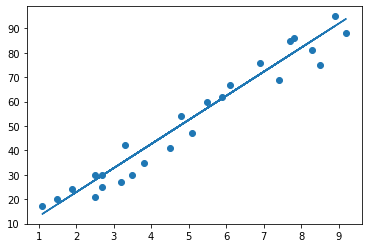

In [10]:
line = lr.coef_*X + lr.intercept_
plt.scatter(X,y)
plt.plot(X,line)
plt.show()

In [11]:
yhat = lr.predict(X_test)

In [12]:
yhat

array([40.60416792, 50.48181243, 27.76323006, 87.0290971 , 47.51851908])

## Predicting score for 9.25 hours

In [13]:
hours = np.array([9.25])
hours = hours.reshape(1,-1)
ans = lr.predict(hours)
ans

array([94.43733048])

In [14]:
ndf = pd.DataFrame({'Actual':y_test,'Predicted':yhat})
ndf.reset_index()
ndf

,Actual,Predicted
22,35,40.604168
21,54,50.481812
0,21,27.763230
3,75,87.029097
12,41,47.518519


### Mean Absolute Error

In [15]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,yhat))

6.8866403471761775


### Accuracy 

In [16]:
print(lr.score(X,y))

0.9508883715106766
